In [ ]:
!pip install graphviz

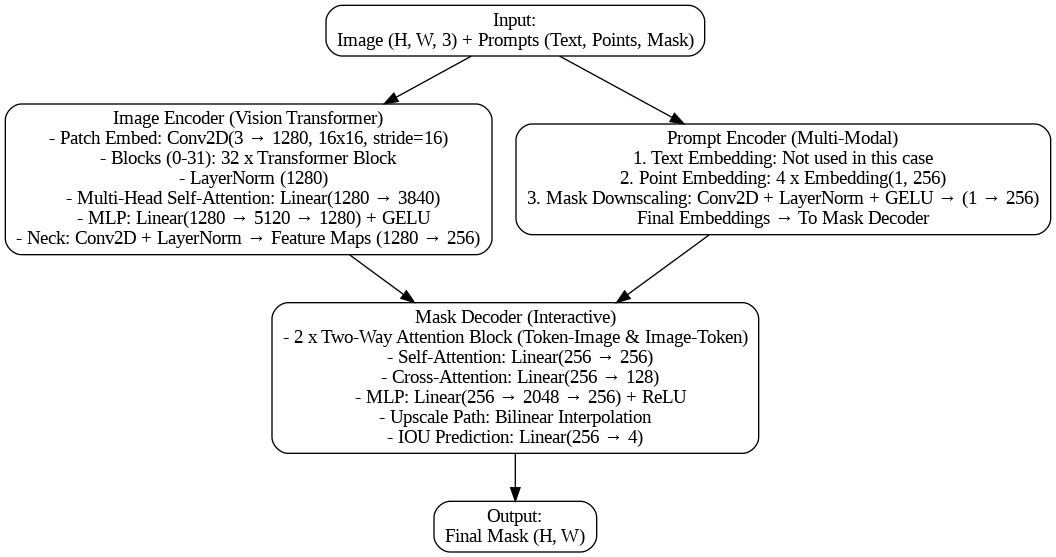

In [ ]:
from graphviz import Digraph
from IPython.display import Image, display

# Create a new directed graph
dot = Digraph(format='png', node_attr={'shape': 'box', 'style': 'rounded'})

# Input
dot.node('Input', 'Input:\nImage (H, W, 3) + Prompts (Text, Points, Mask)')

# Image Encoder
dot.node('ImageEncoder', '''Image Encoder (Vision Transformer)
- Patch Embed: Conv2D(3 → 1280, 16x16, stride=16)
- Blocks (0-31): 32 x Transformer Block
  - LayerNorm (1280)
  - Multi-Head Self-Attention: Linear(1280 → 3840)
  - MLP: Linear(1280 → 5120 → 1280) + GELU
- Neck: Conv2D + LayerNorm → Feature Maps (1280 → 256)''')

# Prompt Encoder
dot.node('PromptEncoder', '''Prompt Encoder (Multi-Modal)
1. Text Embedding: Not used in this case
2. Point Embedding: 4 x Embedding(1, 256)
3. Mask Downscaling: Conv2D + LayerNorm + GELU → (1 → 256)
Final Embeddings → To Mask Decoder''')

# Mask Decoder
dot.node('MaskDecoder', '''Mask Decoder (Interactive)
- 2 x Two-Way Attention Block (Token-Image & Image-Token)
  - Self-Attention: Linear(256 → 256)
  - Cross-Attention: Linear(256 → 128)
  - MLP: Linear(256 → 2048 → 256) + ReLU
- Upscale Path: Bilinear Interpolation
- IOU Prediction: Linear(256 → 4)''')

# Output
dot.node('Output', 'Output:\nFinal Mask (H, W)')

# Define the flow between components
dot.edges([('Input', 'ImageEncoder'),
           ('Input', 'PromptEncoder'),
           ('ImageEncoder', 'MaskDecoder'),
           ('PromptEncoder', 'MaskDecoder'),
           ('MaskDecoder', 'Output')])

# Save the diagram as a PNG file
dot.render('architecture_pipeline')

# Display the PNG image
display(Image(filename='architecture_pipeline.png'))


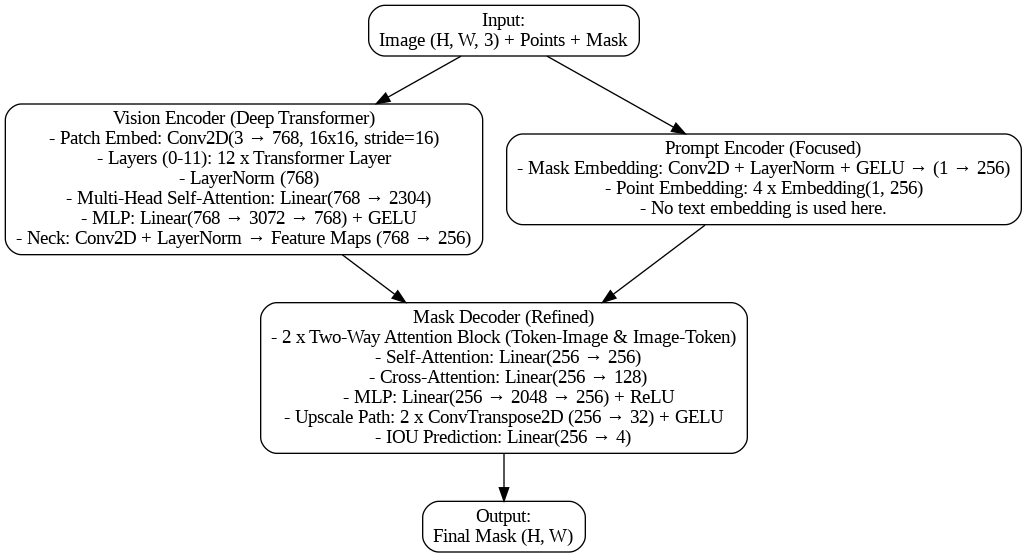

In [ ]:
from graphviz import Digraph
from IPython.display import Image, display

# Create a new directed graph
dot = Digraph(format='png', node_attr={'shape': 'box', 'style': 'rounded'})

# Input
dot.node('Input', 'Input:\nImage (H, W, 3) + Points + Mask')

# Vision Encoder
dot.node('VisionEncoder', '''Vision Encoder (Deep Transformer)
- Patch Embed: Conv2D(3 → 768, 16x16, stride=16)
- Layers (0-11): 12 x Transformer Layer
  - LayerNorm (768)
  - Multi-Head Self-Attention: Linear(768 → 2304)
  - MLP: Linear(768 → 3072 → 768) + GELU
- Neck: Conv2D + LayerNorm → Feature Maps (768 → 256)''')

# Prompt Encoder
dot.node('PromptEncoder', '''Prompt Encoder (Focused)
- Mask Embedding: Conv2D + LayerNorm + GELU → (1 → 256)
- Point Embedding: 4 x Embedding(1, 256)
- No text embedding is used here.''')

# Mask Decoder
dot.node('MaskDecoder', '''Mask Decoder (Refined)
- 2 x Two-Way Attention Block (Token-Image & Image-Token)
  - Self-Attention: Linear(256 → 256)
  - Cross-Attention: Linear(256 → 128)
  - MLP: Linear(256 → 2048 → 256) + ReLU
- Upscale Path: 2 x ConvTranspose2D (256 → 32) + GELU
- IOU Prediction: Linear(256 → 4)''')

# Output
dot.node('Output', 'Output:\nFinal Mask (H, W)')

# Define the flow between components
dot.edges([('Input', 'VisionEncoder'),
           ('Input', 'PromptEncoder'),
           ('VisionEncoder', 'MaskDecoder'),
           ('PromptEncoder', 'MaskDecoder'),
           ('MaskDecoder', 'Output')])

# Save the diagram as a PNG file
dot.render('vision_pipeline')

# Display the PNG image
display(Image(filename='vision_pipeline.png'))
